# Análise de Leads Gerados

Este notebook tem como objetivo analisar os leads gerados por diferentes campanhas de marketing.
Serão explorados os dados referentes aos leads e os investimentos nas campanhas, visando identificar
os padrões de geração de leads e a eficiência de cada campanha.

## Etapas da Análise:
1. Importação dos dados
2. Tratamento de dados
3. Análise Exploratória de Dados (EDA)
4. Visualização e interpretação dos resultados

# 1. **Importação de Bibliotecas Necessárias:**
   - As bibliotecas essenciais para a análise de dados são importadas, preparando o ambiente para as análises subsequentes.


In [1]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


# 2. **Importação dos Dados:**
   - Os dados são carregados para o ambiente de análise, permitindo a manipulação e exploração das informações das campanhas.

In [2]:
# Carregar os dados das planilhas
leads_gerados = pd.read_csv('leads_gerados.csv')
verba = pd.read_csv('verba.csv')

# 3. **Tabela de Verbas e Cálculo do CPL:**
    - Compilação de dados de investimento e cálculo do CPL, fornecendo uma visão clara dos custos e eficiência das campanhas.

In [3]:
# Preencher a coluna "Leads Gerados" na planilha "verba.csv"
leads_gerados_copy = leads_gerados.copy()

leads_gerados_copy["Data"] = pd.to_datetime(
    leads_gerados_copy["Data"], format="%d/%m/%Y"
)

meses = ["janeiro", "fevereiro", "março", "abril", "maio"]
campanhas = ["ebook", "campanha-cupom", "campanha-institucional", "webinar"]
leads_por_mes_campanha = {mes: {campanha: 0 for campanha in campanhas} for mes in meses}

for month_idx, mes in enumerate(meses, start=1):
    for campanha in campanhas:
        filtered_data = leads_gerados_copy[
            (leads_gerados_copy["Data"].dt.month == month_idx)
            & (leads_gerados_copy["Campanha"] == campanha)
        ]

        count_leads = filtered_data.shape[0]
        leads_por_mes_campanha[mes][campanha] = count_leads

for idx, row in verba.iterrows():
    mes = row["Período"]
    campanha = row["Campanha"]
    verba.at[idx, "Leads gerados"] = leads_por_mes_campanha[mes][campanha]

verba["Leads gerados"] = verba["Leads gerados"].astype(int)

In [4]:
# Calcular o CPL (Custo por Lead)
for i in range(len(verba["Leads gerados"])):
    investimento_total = float(
        verba["Investimento total"][i]
        .replace("R$", "")
        .replace(".", "")
        .replace(",", ".")
    )
    leads_gerados_copy = verba["Leads gerados"][i]
    cpl = investimento_total / leads_gerados_copy

    verba["CPL\nCusto por Lead"][i] = f"R$ {cpl:.2f}".replace(".", ",")
  
verba.rename(columns={"CPL\nCusto por Lead": "CPL"}, inplace=True)

- **Período**: Mês em que a campanha foi realizada.
- **Campanha**: Tipo de campanha realizada (como ebook, campanha-cupom, campanha-institucional, webinar, etc.).
- **Investimento Google Ads**: Valor investido em Google Ads para a campanha específica.
- **Investimento Meta Ads**: Valor investido em Meta Ads (ou outra plataforma de anúncios) para a campanha específica.
- **Investimento total**: Investimento total combinado em ambas as plataformas para a campanha.
- **Leads gerados**: Número de leads (potenciais clientes) gerados pela campanha.
- **CPL**: Custo por lead, calculado como o investimento total dividido pelo número de leads gerados.


In [5]:
verba

,Período,Campanha,Investimento Google Ads,Investimento Meta Ads,Investimento total,Leads gerados,CPL
0,janeiro,ebook,"R$ 1.347,60","R$ 1.470,60","R$ 2.818,20",21,"R$ 134,20"
1,janeiro,campanha-cupom,"R$ 1.180,44","R$ 2.835,44","R$ 4.015,88",28,"R$ 143,42"
2,janeiro,campanha-institucional,"R$ 1.905,65","R$ 1.815,65","R$ 3.721,30",19,"R$ 195,86"
3,janeiro,webinar,"R$ 546,80","R$ 558,80","R$ 1.105,60",17,"R$ 65,04"
4,fevereiro,ebook,"R$ 723,45","R$ 821,45","R$ 1.544,90",19,"R$ 81,31"
5,fevereiro,campanha-cupom,"R$ 2.344,22","R$ 2.433,22","R$ 4.777,44",26,"R$ 183,75"
6,fevereiro,campanha-institucional,"R$ 1.854,65","R$ 2.698,23","R$ 4.552,88",19,"R$ 239,63"
7,fevereiro,webinar,"R$ 700,92","R$ 739,45","R$ 1.440,37",16,"R$ 90,02"
8,março,ebook,"R$ 1.289,90","R$ 1.389,89","R$ 2.679,79",21,"R$ 127,61"
9,março,campanha-cupom,"R$ 658,97","R$ 1.467,89","R$ 2.126,86",23,"R$ 92,47"


# 4. **Análise de Qual Campanha Gerou o CPL mais Baixo:**
   - Cálculo do Custo por Lead (CPL) para determinar quais campanhas são mais eficientes em termos de custo.

## 4.1 **Soma Total de CPL por Campanha:**
    - Soma dos CPLs por campanha para análise comparativa de custos totais.

In [6]:

verba_copy = verba.copy()
verba_copy["CPL"] = verba_copy["CPL"].apply(
    lambda x: float(x.replace("R$ ", "").replace(",", "."))
)
total_cpl_por_campanha = verba_copy.groupby("Campanha")["CPL"].sum().reset_index()
total_cpl_por_campanha["CPL total"] = total_cpl_por_campanha["CPL"].apply(
    lambda x: f"R$ {x:.2f}"
)
total_cpl_por_campanha = total_cpl_por_campanha[["Campanha", "CPL total"]]

total_cpl_por_campanha

,Campanha,CPL total
0,campanha-cupom,R$ 603.98
1,campanha-institucional,R$ 1304.83
2,ebook,R$ 617.15
3,webinar,R$ 399.92


## 4.2 A ordenação decrescente dos valores de CPL relacionados as Campanhas

In [7]:
verba_sorted = verba_copy.sort_values(by="CPL", ascending=True)
print("A ordenação decrescente dos valores de CPL relacionados as Campanhas")
print(verba_sorted[["Campanha", "CPL"]])

A ordenação decrescente dos valores de CPL relacionados as Campanhas
                  Campanha     CPL
3                  webinar   65.04
17          campanha-cupom   69.35
15                 webinar   69.83
4                    ebook   81.31
11                 webinar   82.71
7                  webinar   90.02
19                 webinar   92.32
9           campanha-cupom   92.47
13          campanha-cupom  114.99
8                    ebook  127.61
0                    ebook  134.20
16                   ebook  134.29
12                   ebook  139.74
1           campanha-cupom  143.42
5           campanha-cupom  183.75
2   campanha-institucional  195.86
10  campanha-institucional  235.88
6   campanha-institucional  239.63
18  campanha-institucional  253.93
14  campanha-institucional  379.53


## 4.3 A média de CPL para cada campanha

In [8]:
cpl_medio_por_campanha = verba_copy.groupby("Campanha")["CPL"].mean()
print("CPL médio por campanha:")
for campanha, cpl in cpl_medio_por_campanha.items():
    print(f"- {campanha}: R$ {cpl:.2f}")
print()

CPL médio por campanha:
- campanha-cupom: R$ 120.80
- campanha-institucional: R$ 260.97
- ebook: R$ 123.43
- webinar: R$ 79.98



## 4.4 **Gráfico de colunas** CPL médio por cada campanha 

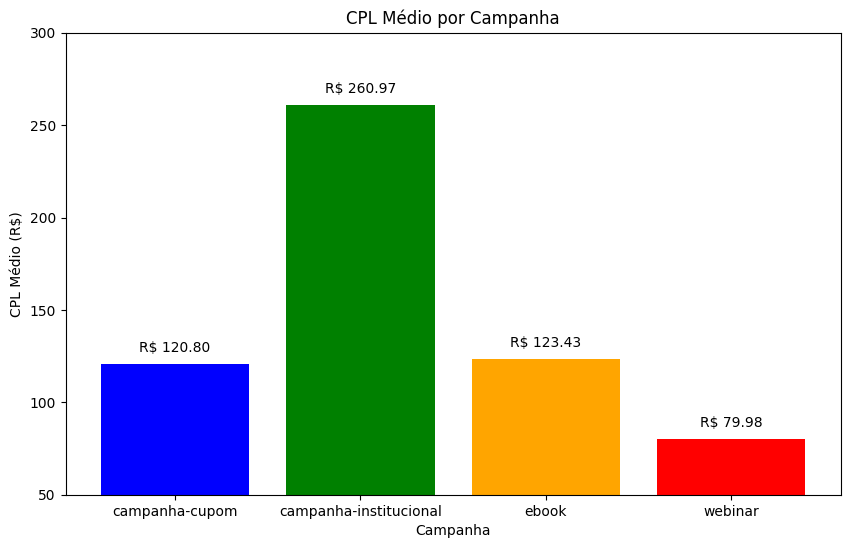

In [9]:
media_cpl_por_campanha = cpl_medio_por_campanha.reset_index()
media_cpl_por_campanha.columns = ["Campanha", "CPL Médio"]


plt.figure(figsize=(10, 6))
bars = plt.bar(
    media_cpl_por_campanha["Campanha"],
    media_cpl_por_campanha["CPL Médio"],
    color=["blue", "green", "orange", "red"],
)

plt.xlabel("Campanha")
plt.ylabel("CPL Médio (R$)")
plt.title("CPL Médio por Campanha")
plt.ylim(50, 300)


for bar, valor in zip(bars, media_cpl_por_campanha["CPL Médio"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        f"R$ {valor:.2f}",
        ha="center",
        va="bottom",
    )

plt.show()

## Questão 1. Qual campanha teve o menor Custo por Lead (CPL)?

Podemos fazer três análises:

1. Somando o CPL de cada campanha mês a mês (considerando apenas os meses de janeiro a maio), vemos que a campanha Webinar teve o CPL mais baixo, custando R$ 399,92 no total.
   
2. Ordenando todos os CPLs, independentemente do mês ou campanha, novamente vemos que o Webinar teve o CPL mais baixo, sendo R$ 65,04 em janeiro.
   
3. Calculando a média de CPL para cada campanha, o Webinar também se destaca, com um custo médio de R$ 79,98.



**O que isso significa?**

Isso indica que a campanha Webinar foi altamente eficiente em termos de investimento, conseguindo gerar leads de alta qualidade a um custo significativamente mais baixo em comparação às outras campanhas analisadas.

# 5. **Análise de Campanha com Maior Volume de Leads de Baixa Qualificação:**
    - Identificação de campanhas que geram grandes volumes de leads, mas com baixa qualificação, ajudando a ajustar estratégias futuras.

## 5.1. **Análise da Contagem de Leads por Campanha:**
   - Identificação do volume de leads gerados por cada campanha, ajudando a compreender a eficácia das campanhas em termos de geração de leads.

In [10]:
contagem_campanhas = leads_gerados["Campanha"].value_counts()
total_leads = len(leads_gerados)
porcentagem_campanhas = contagem_campanhas / total_leads * 100
print("Contagem de leads por tipo de campanha:")
for campanha, contagem in contagem_campanhas.items():
    print(f"{campanha}: {contagem}")

print("\nPorcentagem de leads por tipo de campanha:")
for campanha, percentual in porcentagem_campanhas.items():
    print(f"{campanha}: {percentual:.2f}%")

Contagem de leads por tipo de campanha:
campanha-cupom: 123
ebook: 100
campanha-institucional: 94
webinar: 88

Porcentagem de leads por tipo de campanha:
campanha-cupom: 30.37%
ebook: 24.69%
campanha-institucional: 23.21%
webinar: 21.73%


## 5.2. **Contagem de Leads por Perfil:**
   - Contagem e classificação dos leads por perfil, fornecendo uma visão geral da qualidade dos leads gerados.

In [11]:
contagem_por_perfil = leads_gerados["Perfil"].value_counts().reset_index()
contagem_por_perfil.columns = ["Perfil", "Contagem de Leads"]
relacao_campanha_perfil = (
    leads_gerados.groupby(["Campanha", "Perfil"]).size().reset_index(name="Contagem")
)
print("Contagem de leads por perfil:")
print(tabulate(contagem_por_perfil, headers="keys", tablefmt="psql"))

Contagem de leads por perfil:
+----+---------------------+---------------------+
|    | Perfil              |   Contagem de Leads |
|----+---------------------+---------------------|
|  0 | 100 mil até 300 mil |                 139 |
|  1 | Abaixo de 100 mil   |                 131 |
|  2 | 300 mil até 500 mil |                  62 |
|  3 | 500 mil até 1milhão |                  53 |
|  4 | Acima de 1milhão    |                  20 |
+----+---------------------+---------------------+


In [12]:
print("\nRelacionamento entre campanhas e perfis:")
print(tabulate(relacao_campanha_perfil, headers="keys", tablefmt="psql"))


Relacionamento entre campanhas e perfis:
+----+------------------------+---------------------+------------+
|    | Campanha               | Perfil              |   Contagem |
|----+------------------------+---------------------+------------|
|  0 | campanha-cupom         | 100 mil até 300 mil |         27 |
|  1 | campanha-cupom         | 300 mil até 500 mil |         22 |
|  2 | campanha-cupom         | Abaixo de 100 mil   |         74 |
|  3 | campanha-institucional | 100 mil até 300 mil |         21 |
|  4 | campanha-institucional | 300 mil até 500 mil |         18 |
|  5 | campanha-institucional | 500 mil até 1milhão |         27 |
|  6 | campanha-institucional | Abaixo de 100 mil   |         18 |
|  7 | campanha-institucional | Acima de 1milhão    |         10 |
|  8 | ebook                  | 100 mil até 300 mil |         61 |
|  9 | ebook                  | 300 mil até 500 mil |         11 |
| 10 | ebook                  | 500 mil até 1milhão |         14 |
| 11 | ebook        

## 5.3. **Relacionamento entre Campanha e Perfis:**
   - Análise da correspondência entre campanhas e perfis de leads, ajudando a identificar quais campanhas atraem quais tipos de leads.

In [13]:
df = relacao_campanha_perfil.copy()
condicoes = [
    df["Perfil"].isin(
        ["100 mil até 300 mil", "300 mil até 500 mil", "500 mil até 1milhão"]
    ),
    df["Perfil"].isin(["Acima de 1milhão"]),
    df["Perfil"] == "Abaixo de 100 mil",
]
escolhas = ["Leads Qualificados", "Super Qualificados", "Desclassificados"]
df["Classificação"] = np.select(condicoes, escolhas, default="")
df = df.groupby(["Campanha", "Classificação"])["Contagem"].sum().reset_index()
df["Total_por_Campanha"] = df.groupby("Campanha")["Contagem"].transform("sum")
df["Porcentagem"] = (df["Contagem"] / df["Total_por_Campanha"]) * 100
df["Porcentagem"] = df["Porcentagem"].round(2)

df

,Campanha,Classificação,Contagem,Total_por_Campanha,Porcentagem
0,campanha-cupom,Desclassificados,74,123,60.16
1,campanha-cupom,Leads Qualificados,49,123,39.84
2,campanha-institucional,Desclassificados,18,94,19.15
3,campanha-institucional,Leads Qualificados,66,94,70.21
4,campanha-institucional,Super Qualificados,10,94,10.64
5,ebook,Desclassificados,10,100,10.00
6,ebook,Leads Qualificados,86,100,86.00
7,ebook,Super Qualificados,4,100,4.00
8,webinar,Desclassificados,29,88,32.95
9,webinar,Leads Qualificados,53,88,60.23


### 5.3.1. **Histograma: Análise de Porcentagem de Leads por Classificação e Campanha:**
   - Visualização da distribuição de leads por classificação dentro de cada campanha, auxiliando na avaliação da qualidade dos leads gerados por campanha.

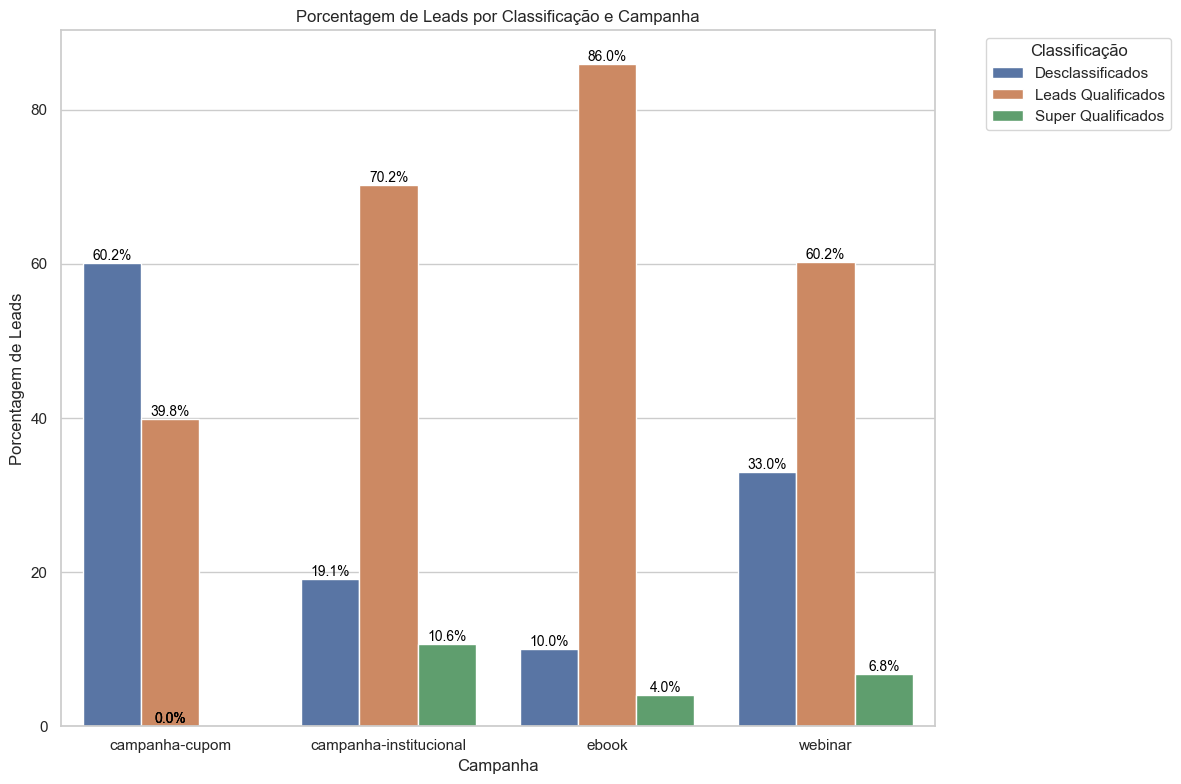

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Campanha", y="Porcentagem", hue="Classificação", data=df)
plt.xlabel("Campanha")
plt.ylabel("Porcentagem de Leads")
plt.title("Porcentagem de Leads por Classificação e Campanha")
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.legend(title="Classificação", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Questão 2. Tem alguma campanha que está gerando volume alto de leads, porém com qualificação baixa? Qual?

    Sim, a campanha "campanha-cupom" está gerando um volume alto de leads, principalmente na faixa "Abaixo de 100 mil" com 74 leads. No entanto, essa faixa é considerada desqualificada segundo os critérios estabelecidos, o que significa que esses leads têm menor potencial de conversão em comparação com os leads qualificados (entre 100 mil e 500 mil) ou super qualificados (acima de 1 milhão).

Isso afeta os leads gerados de várias maneiras:
1. **Menor taxa de conversão**: Leads desqualificados têm menos probabilidade de se converterem em clientes pagantes.
2. **Baixo retorno sobre investimento**: O custo por lead pode ser mais alto quando muitos leads são desqualificados, reduzindo o retorno financeiro da campanha.
3. **Dificuldade na segmentação**: Leads desqualificados podem exigir mais esforço de segmentação e nutrição para se tornarem qualificados, aumentando os custos operacionais.

Portanto, apesar do volume alto, é essencial revisar a segmentação e o direcionamento da campanha "campanha-cupom" para aumentar a qualificação dos leads e melhorar a eficácia global da estratégia de geração de leads.



## 5.4 **Gráfico de Pizza:** Comparando Campanhas

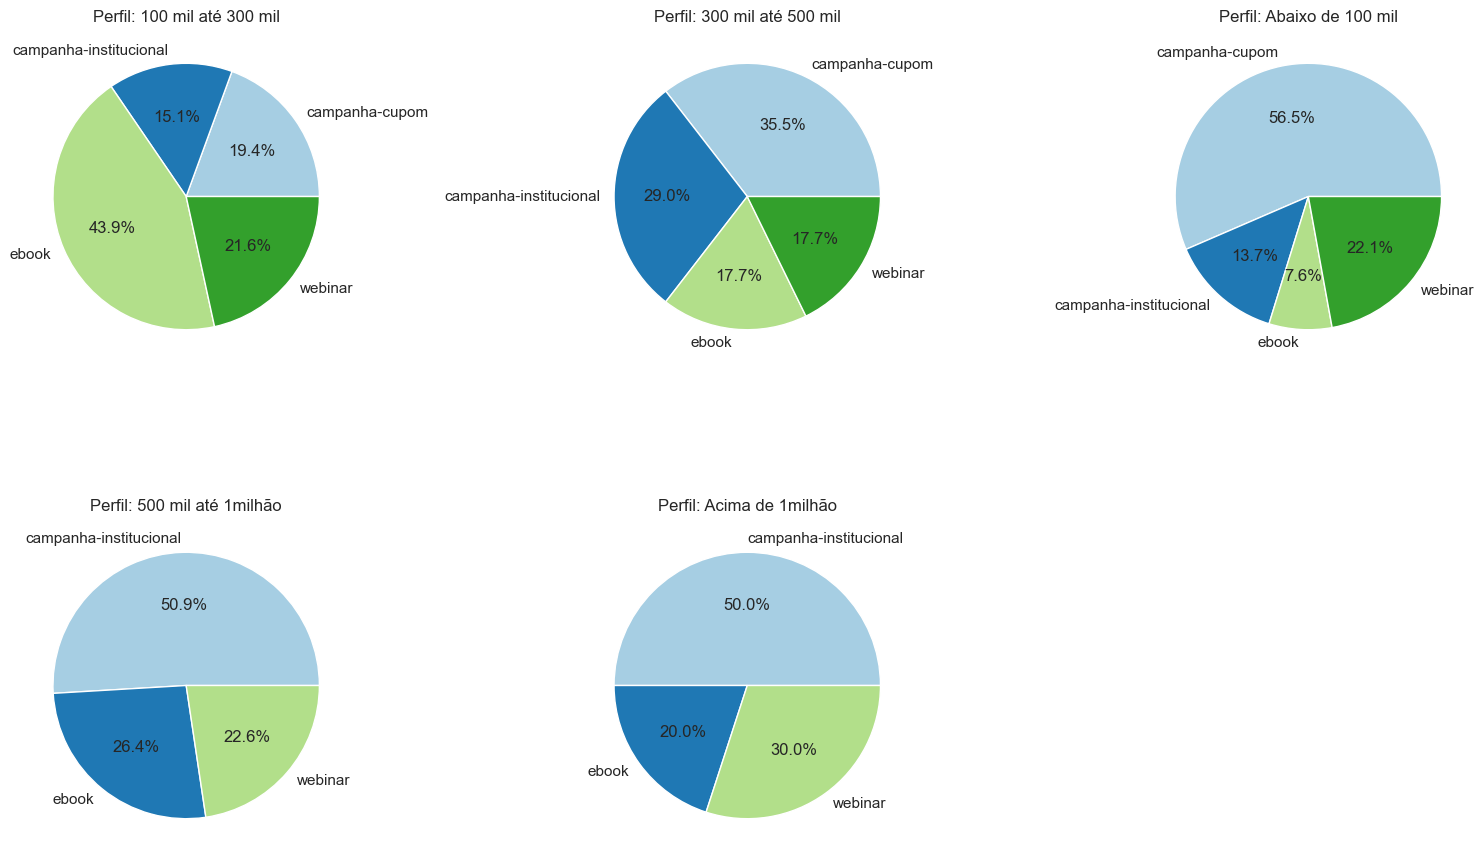

In [15]:
df = relacao_campanha_perfil.copy()

total_leads_por_perfil = (
    df.groupby("Perfil")["Contagem"].sum().reset_index()
)
total_leads_por_perfil = total_leads_por_perfil.rename(columns={"Contagem": "Total"})
df = df.merge(
    total_leads_por_perfil, on="Perfil"
)
df["Porcentagem"] = round(
    ((df["Contagem"] / df["Total"]) * 100), 2
)


def tabela_por_perfil(perfil):
    tabela = df[df["Perfil"] == perfil][
        ["Campanha", "Contagem", "Porcentagem"]
    ]
    return tabela


def grafico_por_perfil(perfil, ax):
    tabela = tabela_por_perfil(perfil)
    ax.pie(
        tabela["Porcentagem"],
        labels=tabela["Campanha"],
        autopct="%1.1f%%",
        colors=plt.cm.Paired.colors,
    )
    ax.set_title(f"Perfil: {perfil}")


perfis = df["Perfil"].unique()
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for ax, perfil in zip(axs, perfis):
    grafico_por_perfil(perfil, ax)
for ax in axs[len(perfis) :]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

# 6. Performace da Campanha Institucional


## 6.1 **Heatmap**: Relacionamento entre Campanhas e Perfis de Leads

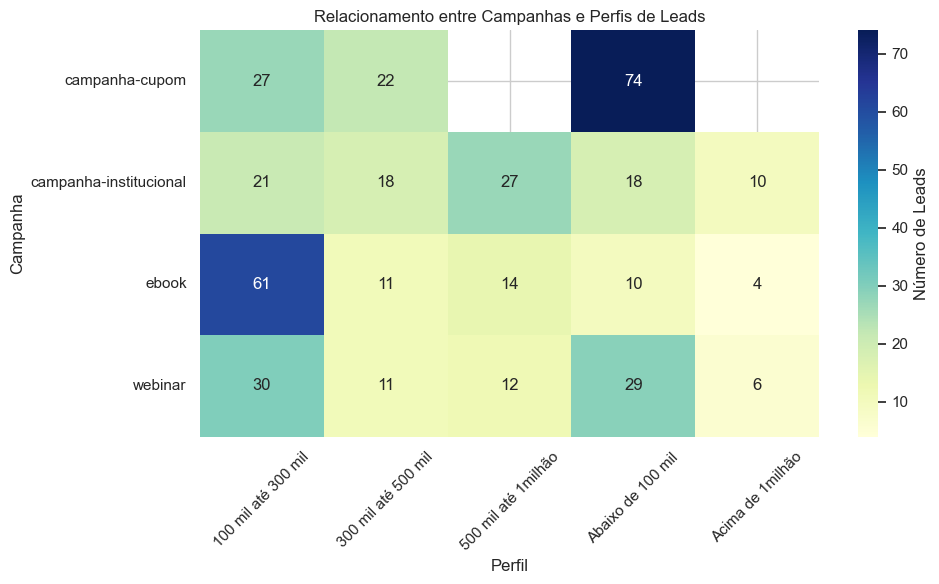

In [16]:
df = relacao_campanha_perfil.copy()

# Criando um pivot table para preparar os dados para o heatmap
heatmap_data = df.pivot(
    index="Campanha", columns="Perfil", values="Contagem"
)

# Criando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlGnBu",
    fmt="g",
    cbar_kws={"label": "Número de Leads"},
)
plt.title("Relacionamento entre Campanhas e Perfis de Leads")
plt.xlabel("Perfil")
plt.ylabel("Campanha")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 6.2 **Gráfico de Pizza**: Distribuição de Perfis Atraídos pela Campanha Institucional

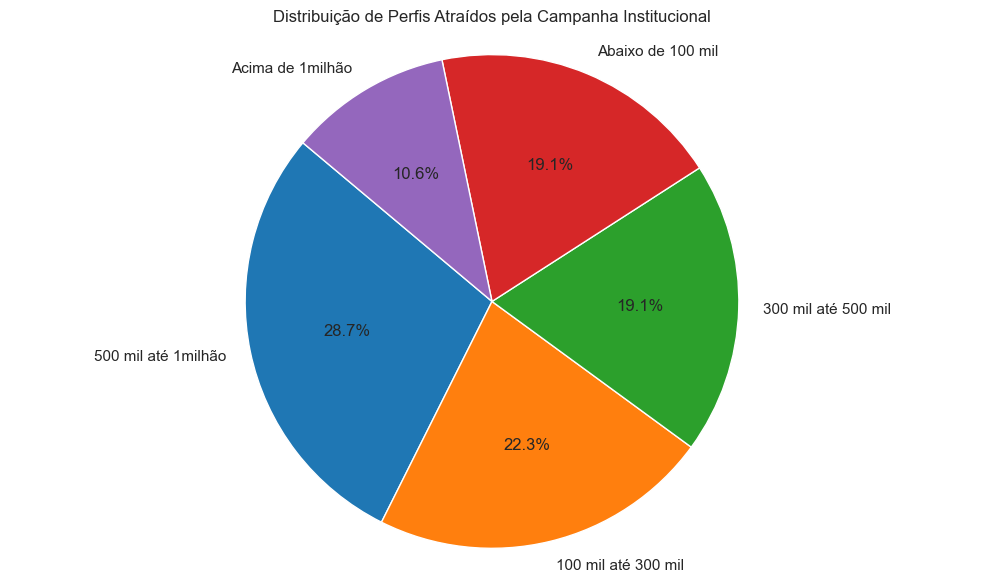

In [17]:
leads_campanha_institucional = leads_gerados[
    leads_gerados["Campanha"] == "campanha-institucional"
]

contagem_por_perfil = leads_campanha_institucional["Perfil"].value_counts()

porcentagens = (contagem_por_perfil / contagem_por_perfil.sum()) * 100

cores_personalizadas = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

plt.figure(figsize=(10, 6))
plt.pie(
    porcentagens,
    labels=porcentagens.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=cores_personalizadas,
)
plt.title("Distribuição de Perfis Atraídos pela Campanha Institucional")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [18]:
df = verba.copy()
# Filtrando para obter apenas os dados da campanha-institucional
campanha_institucional = df[df["Campanha"] == "campanha-institucional"]

# Somando o total de leads gerados pela campanha-institucional
total_leads_campanha_institucional = campanha_institucional["Leads gerados"].sum()

print(
    f"Total de leads gerados pela campanha 'campanha-institucional': {total_leads_campanha_institucional}"
)

Total de leads gerados pela campanha 'campanha-institucional': 94


## Questão 3. O cliente pediu para desligarmos a campanha “campanha-institucional” sem uma justificativa baseada em dados, apenas porque ele "cansou" dessa campanha. Investigue se essa campanha tem performance, ou não, para ser desligada. A performance está diretamente ligada à qualidade dos leads gerados por ela.


Para investigar se a campanha "campanha-institucional" deve ser desligada com base na performance dos leads gerados, devemos observar os dados. Desligar uma campanha sem uma justificativa baseada em dados pode ser prejudicial:

- 100 mil até 300 mil: 21 leads
- 300 mil até 500 mil: 18 leads
- 500 mil até 1 milhão: 27 leads
- Abaixo de 100 mil: 18 leads
- Acima de 1 milhão: 10 leads

Os dados mostram a distribuição de leads por perfil para a campanha "campanha-institucional", com média de 18,8 leads por perfil. Isso sugere uma geração considerável e equilibrada de leads entre os diferentes grupos demográficos.

A campanha totalizou 94 leads, representando 23,21% do total, indicando uma proporção significativa de leads qualificados. Portanto, considerando o impacto positivo na qualificação dos leads, recomenda-se manter a campanha ativa, a menos que haja uma justificativa clara e baseada em dados para desligá-la.

# 7. Insight para o gestor de tráfego

## 7.1  **Relacionamento entre Campanha e Mídia:**
   - Análise do desempenho de diferentes mídias nas campanhas, permitindo a identificação de quais mídias são mais eficazes.

In [19]:
contagem = (
    leads_gerados.groupby(["Campanha", "Mídia"]).size().reset_index(name="Contagem")
)
tabela_formatada = tabulate(contagem, headers="keys", tablefmt="pretty")
print(tabela_formatada)

+----+------------------------+-----------------+----------+
|    |        Campanha        |      Mídia      | Contagem |
+----+------------------------+-----------------+----------+
| 0  |     campanha-cupom     | busca-orgânica  |    18    |
| 1  |     campanha-cupom     |     e-mail      |    20    |
| 2  |     campanha-cupom     |   google ads    |    52    |
| 3  |     campanha-cupom     |    meta ads     |    14    |
| 4  |     campanha-cupom     | social-orgânico |    18    |
| 5  |     campanha-cupom     |     uknown      |    1     |
| 6  | campanha-institucional |   Link-da-bio   |    12    |
| 7  | campanha-institucional | busca-orgânica  |    14    |
| 8  | campanha-institucional |     e-mail      |    23    |
| 9  | campanha-institucional |   google ads    |    25    |
| 10 | campanha-institucional |    meta ads     |    11    |
| 11 | campanha-institucional |     uknown      |    9     |
| 12 |         ebook          |   Link-da-bio   |    16    |
| 13 |         ebook    

## 7.2 **Visualização de Heatmap**: Relação entre Campanhas e Tipos de Mídia:
   - Criação de um heatmap que mostra a relação entre os tipos de mídia utilizados e as campanhas, facilitando a visualização de padrões de uso de mídia.

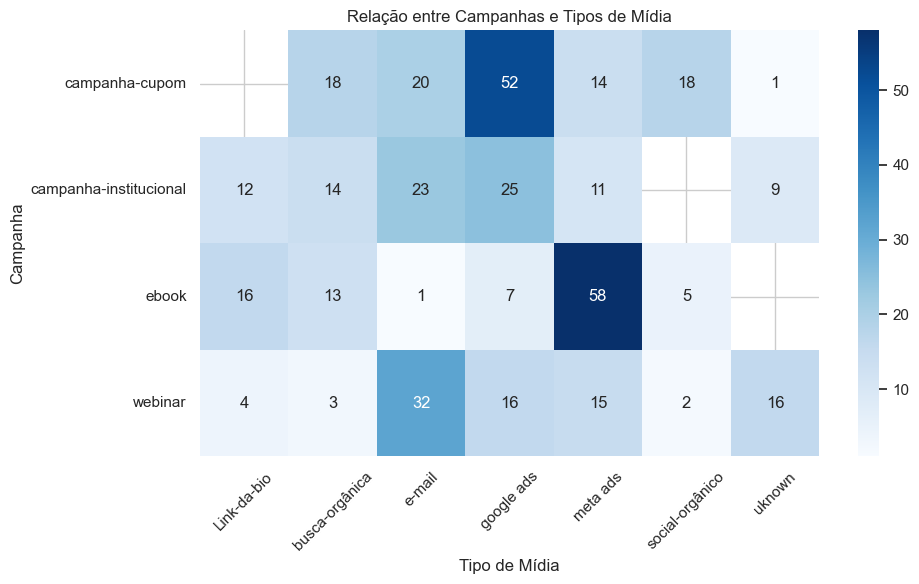

In [20]:
contagem = (
    leads_gerados.groupby(["Campanha", "Mídia"]).size().reset_index(name="Contagem")
)
pivot_table = contagem.pivot(index="Campanha", columns="Mídia", values="Contagem")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt="g")
plt.title("Relação entre Campanhas e Tipos de Mídia")
plt.xlabel("Tipo de Mídia")
plt.ylabel("Campanha")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Questão 4. **Gere pelo menos um insight para auxiliar o gestor de tráfego.**

   Um insight seria redistribuir a verba da 'campanha-cupom' para a 'campanha-ebook'. A 'campanha-cupom' está gerando muitos leads desclassificados, enquanto a 'campanha-ebook' está gerando uma alta porcentagem de leads qualificados e super qualificados. Esse ajuste pode aumentar a eficiência do investimento em marketing, gerando mais leads de qualidade.

## Predições e Possíveis Treinamentos de Máquina

Com os resultados obtidos, podemos considerar as seguintes ações para predições e treinamento de máquina:

1. **Modelos de Regressão:**
   - Utilizar modelos de regressão para prever o CPL com base em variáveis como tipo de campanha, investimento e tipo de mídia.

2. **Classificação de Leads:**
   - Treinar modelos de classificação (como árvores de decisão, SVM, redes neurais) para prever a qualificação dos leads com base nos dados das campanhas.

3. **Segmentação de Campanhas:**
   - Aplicar clustering para segmentar campanhas e identificar padrões ocultos que possam melhorar a segmentação e personalização das campanhas futuras.

## Questão 5. **Precisamos gerar ideias para a próxima criação de campanha que será feita. Analisando os dados, o que tem funcionado melhor para esse cliente? São campanhas de webinar? Ebook? Ou campanha institucional? Gere uma ideia para uma nova campanha, a partir da análise de relatório. Algo que pode te ajudar é analisar qual o tema das campanhas que mais geraram leads qualificados.**

   As campanhas de 'ebook' têm funcionado melhor, gerando uma alta porcentagem de leads qualificados. Para a próxima campanha, sugere-se criar uma série de webinars ou workshops virtuais baseados em temas específicos que atraiam o público-alvo. Isso pode capitalizar o sucesso das campanhas de 'ebook' e atrair um público ainda mais engajado.
1. **Campanhas que funcionam melhor em termos de CPL e geração de leads qualificados e super qualificados:**
   - **CPL mais baixo:** A campanha 'webinar' apresenta o CPL mais baixo, o que indica um bom desempenho nesse aspecto.
   - **Leads Qualificados e Super Qualificados:** A campanha 'ebook' se destaca com uma porcentagem significativa de leads qualificados (72%) e super qualificados (18%), totalizando 90% de leads de qualidade.

2. **Melhorar a performance de cada campanha:**
   - **Campanha-cupom:** Considerando que essa campanha tem uma quantidade considerável de leads desclassificados, uma estratégia pode ser melhorar a segmentação e personalização dos anúncios para atrair um público mais qualificado.
   - **Campanha-institucional:** Embora tenha uma boa quantidade de leads qualificados e super qualificados, poderia-se explorar melhor a diversificação das mídias ou ajustar a mensagem para atrair um volume maior de leads qualificados.
   - **Ebook:** Fortalecer ainda mais o conteúdo oferecido, explorando novos canais de distribuição ou otimizando a captação através de ads.
   - **Webinar:** Aumentar o foco na conversão de leads desclassificados em qualificados, talvez através de follow-ups mais direcionados pós-webinar.

3. **Ideia para uma nova campanha:**
   - Considerando o sucesso da campanha 'ebook' em gerar leads qualificados e super qualificados, uma nova campanha poderia explorar a criação de conteúdos educativos mais aprofundados, como uma série de webinars ou workshops virtuais, com temas específicos relacionados ao interesse do público-alvo. Isso poderia atrair um público mais engajado e predisposto a se qualificar como leads de alta qualidade.

Essas sugestões visam aproveitar os pontos fortes das campanhas atuais e explorar novas oportunidades para melhorar os resultados gerais do marketing digital.

## Impacto na tomada de decisão
   - **Alocação de Recursos**: Investir mais em campanhas com CPL mais baixo, como webinar, para maximizar o retorno sobre o investimento.
   - **Otimização de Estratégias**: Analisar campanhas com CPL alto, como institucional, para melhorar eficiência e qualidade dos leads.
   - **Maximização do ROI**: Utilizar CPL como indicador para decidir onde concentrar esforços de marketing e alcançar melhores resultados financeiros.

Esses números ajudam na gestão eficaz de campanhas, direcionando investimentos onde há potencial para maior eficiência e retorno.

Embora a campanha institucional possa gerar um volume aparentemente alto de leads, seu CPL elevado sugere que há espaço para melhorias na eficiência e na qualidade dos leads adquiridos através dessa campanha.

**ROI (Return on Investment)** é uma métrica financeira utilizada para calcular o retorno obtido sobre um investimento, expressando o lucro ou prejuízo em relação ao custo do investimento inicial.

**Cálculo do ROI**:

O ROI é calculado usando a fórmula:

  RO% = (Lucro/Investimento Total) * 100

Como o lucro é zero (assumindo que não temos informações sobre receita), o ROI será apenas o inverso do investimento total, indicando quanto foi recuperado em termos de investimento.

# 8. Fluxo de automação

# Questão 6. **Crie um fluxo de automação de e-mails e WhatsApp e notificação a partir da entrada de leads.**

   - **Primeiro E-mail (Imediato):** Envio de boas-vindas e confirmação do interesse no ebook ou webinar. Forneça um link para o conteúdo ou detalhes do webinar.
   - **Primeira Notificação WhatsApp (1 dia após a inscrição):** Agradeça pelo interesse e ofereça suporte adicional, como a inscrição em um grupo exclusivo de WhatsApp para discussões.
   - **Segundo E-mail (3 dias após a inscrição):** Envio de conteúdo adicional relacionado ao tema do ebook ou webinar. Pode ser um artigo ou um vídeo.
   - **Segunda Notificação WhatsApp (7 dias após a inscrição):** Check-in para ver se eles estão aproveitando o conteúdo e oferecendo um incentivo, como um desconto exclusivo ou uma oferta especial.
   - **Terceiro E-mail (10 dias após a inscrição):** Solicitação de feedback e uma chamada para ação para se inscrever em outro webinar ou baixar outro material educativo.
   - **Terceira Notificação WhatsApp (14 dias após a inscrição):** Lembrete sobre qualquer próximo evento ou nova oferta disponível.

In [21]:
# Fluxo de automação
fluxo_automacao = [
    {"dia": 0, "acao": "Enviar e-mail de boas-vindas"},
    {"dia": 2, "acao": "Enviar mensagem no WhatsApp com oferta especial"},
    {"dia": 5, "acao": "Enviar notificação por e-mail com conteúdo adicional"}
]

print("Fluxo de automação de e-mails, WhatsApp e notificações:")
for etapa in fluxo_automacao:
    print(f"Dia {etapa['dia']}: {etapa['acao']}")

Fluxo de automação de e-mails, WhatsApp e notificações:
Dia 0: Enviar e-mail de boas-vindas
Dia 2: Enviar mensagem no WhatsApp com oferta especial
Dia 5: Enviar notificação por e-mail com conteúdo adicional
